In [ ]:
# Django 프로젝트 생성
django-admin startproject mysite
## 터미널에서 입력

### polls 애플리케이션 디렉토리 및 하위 필요 파일 생성.
1. 터미널 해당 폴더 이동
2. 명령어 입력
> python manage.py startapp polls

### 프로젝트 설정 파일 변경
1. 터미덜 해당폴더 이동
2. 명령어 입력 (노트패드 open)
> notepad settings.py

* 설정 내용
1. ALLOWED_HOSTS 항목 적절하게 지정
```
DEBUG = True : 개발모드
        False : 운영모드
        * 운영모드일떈 반드시 서버, IP의 도메인 지정해야함.
        * 개발모드일 경우 default
        ['localhost','127.0.0.1']
* 필자처럼 리눅스 192.168.56.101 서버에서 개발시
ALLOWED_HOSTS = ['192.168.56.101','localhost','127.0.0.1']
```
2.  프로젝트에 포함되는 앱들 모두 설정파일에 등록해야함
(polls 도 포함)
```
INSTALLED_APPS = [
    'pools.app.PollsConfig',    # 추가
    'django.contrib.admin',
    'django.contrib.auth',
    'django.contrib.contenttypes',
    'django.contrib.sessions',
    'django.contrib.messages',
    'django.contrib.staticfiles',
]
```
장고가 설정 클래스 찾을 수 있도록 모듈 경로까지 포함하여 등록
'polls.apps.PollsConfig'

3. 프로젝트에 사용할 DB 엔진 설정.
```
DATABASES = {
    'default': {
        'ENGINE': 'django.db.backends.sqlite3',
        'NAME': BASE_DIR / 'db.sqlite3',
    }
}

```
4. 타임존 지정 (세계 표준시 => 한국시간으로)
```
# TIME_ZONE = 'UTC'
TIME_ZONE = 'Asia/Seoul'
```
* USE_TZ = True 라고 설정 시, 장고가 알아서 시간대 조정함.
일광절약시간제 : Daylight Saving Time
=> 설정
: USE_TZ = True
    - 데이터베이스에 저장되는 시간은 UTC인데 Local은 한국 시간대일때.

* 근데, 둘 다 한국시간대면 그냥
: USE_TZ = False
상세 내용
-> https://docs.djangoproject.com/en/4.0/topics/il8n/timezones/

### 기본 테이블 생성
* migrate 명령 : DB에 변경사항 있을 시 이를 반영해주는 명령어
> python manage.py migrate
* 장고 사용 시, 프로그래밍 전에 이미 테이블 만들어야함
  - 기본적으로, 프로그래밍 시 반드시  사용자와 그룹 테이블 등이 필요하다는 가정 하에 만들어져있기 때문.

### Django project 실행
> python manage.py runserver

http://127.0.0.1:8000/

- Admin 사이트 로그인 페이지
http://127.0.0.1:8000/admin
  - 슈퍼유저 생성
  > python manage.py createsuperuser

  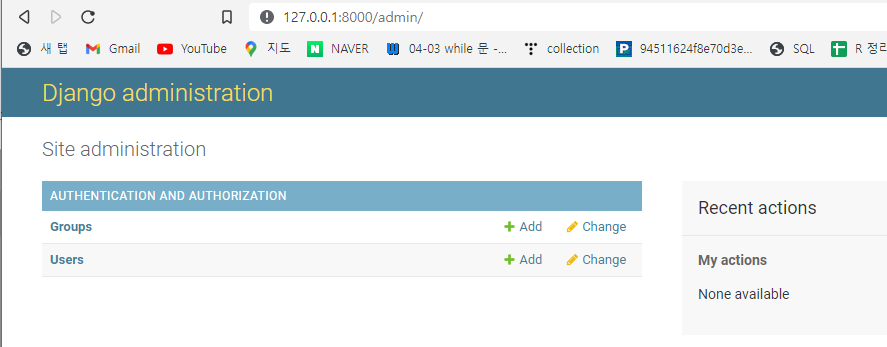
- Admin 사이트에서 앞으로 만들 테이블에 대한 데이터 입력, 변경, 삭제 작업 가능.
- Groups, Users가 보이는 이유
: settings.py에 미리 정의되어 있기 때문.

### 프로젝트 디렉토리 확인.
> tree /F ch99

## 3.6 Model Cording

## 터미널 명령어 
notepad models.py # 테이블 정의
notepad admins.py # 정의된 테이블 Admin에 보이게 함.
python manage.py makemigrations # 변경 필요  사항 추출
python manage.py migrate # 변경사항 반영
python manage.py runserver # 현재까지 자업 확인.

### polls > models.py 코드
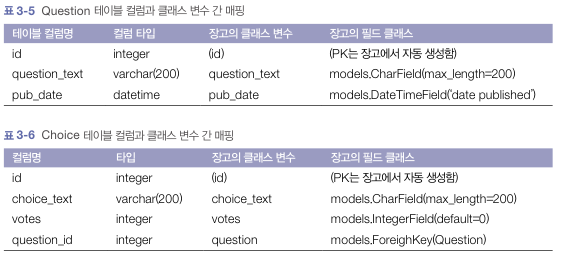

In [ ]:
from django.db import models

class Question(models.Model):
  question_test = models.CharField(max_length=200)
  pub_data = models.DateTimeField('date published')
  
  def __str__(self):
    return self.question_test
  
class Choice(models.Model):
  question = models.ForeignKey(Question,on_delete=models.CASCADE)
  choice_text = models.CharField(max_length=200)
  votes = models.IntegerField(default=0)
  
  def __str__(self):
    return self.choice_text

# Create your models here.

### polls > admin.py 코드

In [ ]:
from django.contrib import admin
from polls.models import Question,Choice

admin.site.register(Question)
admin.site.register(Choice)

# Register your models here.

* note : 테이블 새로 생성 시,
- models.py
- admin.py
  - 둘 다 수정해야함.

### 변경사항 반영
명령어
```
python manage.py makemigrations
python manage.py migrate
```
- 장고가 사용하는 SQL 확인
```
python manage.py sqlmigrate polls 0901
```
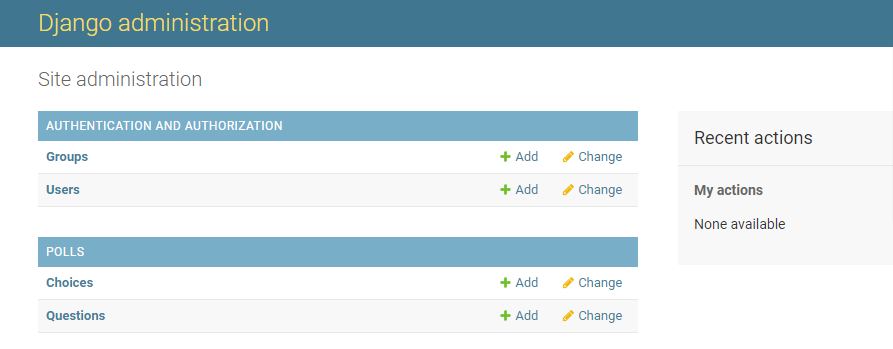

### modul import 시 권장사항

In [ ]:
# 하위 모듈 import 불가 (사용불가)
import polls
admin.site.register(polls.models.Question)

# 방법1
## 가능하지만, 추천x
import polls.models
admin.site.register(polls.models.Question)

# 사용불가
## 단독 import => 모듈이나 패키지만 허용.(class는 안됨)
import polls.models.Question
admin.site.register(polls.models.Question)

# 방법2(절대경로 임포트)
from polls.models import Question
admin.site.register(Question)

# 방법3
from polls import models
admin.site.register(models.Question)

# 방법4
## 상대경로 import => 재사용 측면 유리.
from .models import Question
admin.site.register(Question)

# 방법5
from .import models
admin.site.register(models.Question)


## 3.7 앱 개발 - View, Template
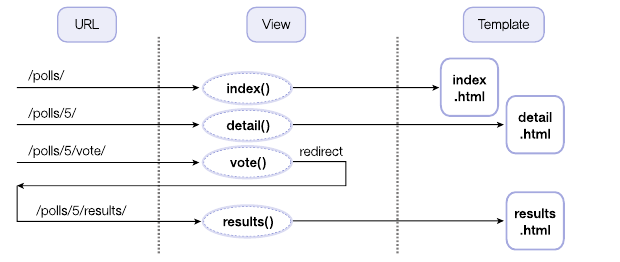

=> url.py
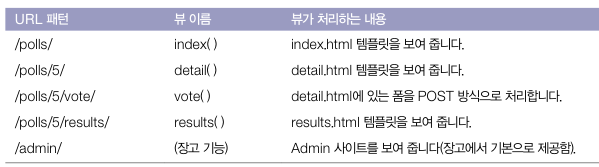

- 로직 흐름
: URLconf => view or template

In [ ]:
# urls.py 파일
from django.contrib import admin
from django.urls import path
from polls import views

urlpatterns = [
    path('admin/', admin.site.urls),
    path('polls/',views.index,name='index'),
    path('polls/<intLquestion_id>/',views.detail,name='detail'),
    path('polls/<intLquestion_id>/results/',views.results,name='results'),
    path('polls/<intLquestion_id>/vote/',views.vote,name='vote'),
]
# 장고는 url 분석 시,
# ROOT_URLCONF = 'mysite2.urls'
### 이거 제일 먼저 분석함.

In [ ]:
### urls.py를 1개, 2개의 파일에 둘 다 작성 가능.
# 방법1
## 2개 - mysite
from django.contrib import admin
from django.urls import path,include
urlpatterns = [
  path('admin/',admin.site.urls),
  path('polls/',include('polls.urls'))
]

In [ ]:
# 방법2
## 2개 - polls
from django.urls import path
from . import views

app_name = 'polls'
urlpatterns = [
  path('',views.index,name='index'),
  path('<int:question_id>/',views.detail,name='detail'),
  path('<int:question_id>/results',views.results,name='results'),
  path('<int:question_id>/vote',views.vote,name='vote'),
]

### 필자 경험상, 방법2가 더 좋다고 함.

### polls > index.html
```
{% if latest_question_list %}
  <ul>
    {% for question in latest_question_list}
      <li><a href="/polls/{{question.id}}/">({question.question_text})</a></li>
    {% endfor %}
  </ul>

{% else %}
  <p>No polls are available.</p>
{% endif %}
```

### views.py > index()
```
from django.shortcuts import render
from polls.models import Question

def index(request):
  latest_question_list = Question.objects.all().order_by('-pub_date')[:5]
  context = {'latest_question_list':latest_question_list}
  return render(request,'polls/index.html',context)
# Create your views here.
```